## Minimal Logistic Regression Classifier Implementation

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.base import BaseEstimator
import numba as nb

In [3]:
class LogisticRegression(BaseEstimator):
        
    def __init__(self, alpha, max_iter):
        self.alpha = alpha
        self.max_iter = max_iter
        
    
    @staticmethod
    @nb.vectorize([nb.float64(nb.float64)])  # Just for speeding things up.
    def sigmoind(z):
        return 1 / (1 + np.e ** (-z))
    

    def fit(self, X, y):
        assert X.shape[0] == y.shape[0]
        m = X.shape[0]
        
        self.loss_ = np.zeros(self.max_iter)
        self.features_num_ = X.shape[1]
        self.weights_ = np.zeros(self.features_num_)
        self.bias_ = 0.
        
        for i in range(self.max_iter):
            prediction_reg = (X @ self.weights_) + self.bias_
            prediction = self.sigmoind(prediction_reg)
            
            self.loss_[i] = - (y @ np.log(prediction) + (1 - y) @ np.log(1 - prediction)) / m
            d_loss = prediction - y  # - (y - prediction)
            
            dw = (d_loss @ X) / m
            db = d_loss.sum() / m
            
            self.weights_ -= self.alpha * dw
            self.bias_ -= self.alpha * db
    
    
    def predict_proba(self, X):
        assert X.shape[1] == self.features_num_
        
        prediction_reg = (X @ self.weights_) + self.bias_
        proba = self.sigmoind(prediction_reg)

        return np.column_stack((1 - proba, proba))
    
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

In [4]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=2_000, n_features=10)

In [5]:
clf = LogisticRegression(alpha=0.1, max_iter=300)
clf.fit(X, y)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y, clf.predict(X))

0.932

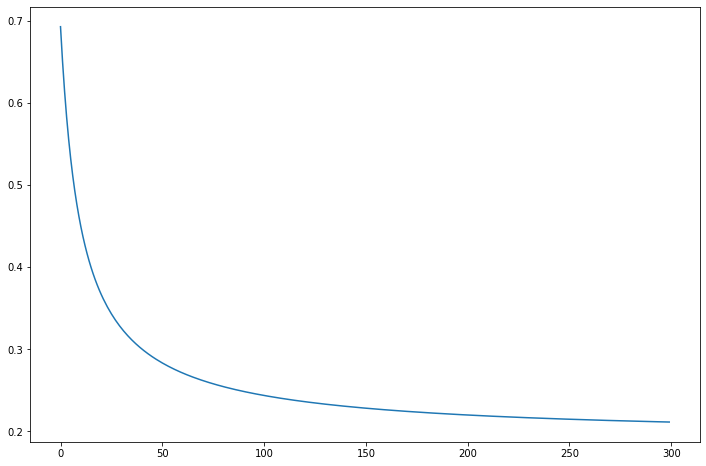

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
plt.plot(clf.loss_);

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(alpha=0.1, max_iter=300), X, y, scoring='accuracy', cv=10, n_jobs=-1).mean()

0.9259999999999999

In [9]:
from sklearn.linear_model import LogisticRegression as sk_clf
cross_val_score(sk_clf(), X, y, scoring='accuracy', cv=10, n_jobs=-1).mean()

0.9349999999999999

In [10]:
from sklearn.multiclass import OneVsRestClassifier
X_5, y_5 = make_classification(n_samples=2_000, n_features=10, n_classes=5, n_informative=4)

clf = OneVsRestClassifier(LogisticRegression(alpha=0.1, max_iter=500), n_jobs=-1)
cross_val_score(clf, X_5, y_5, scoring='accuracy', cv=10, n_jobs=-1).mean()

0.507

In [11]:
cross_val_score(sk_clf(), X_5, y_5, scoring='accuracy', cv=10, n_jobs=-1).mean()

0.503